In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Initialization of System

In [12]:
### Rayleigh number, Reynolds number, Prandlt number, Grashof number, Nuselt number 
g = 9.8 #m/s
beta = 0.0034 #K^-1 at 298K
nu_visc = 0.00001568 #  #m^2 / s at 300K - KINEMATIC VISCOSITY
alpha = 0.00002218 #m^2 / s at 300K

T_base = np.linspace(273, 283, 100) #50F to 100F
T_top = np.linspace(273, 283, 100)

#def bulk_T(topTemp, bottomTemp):
#    return (topTemp+bottomTemp) / 2

H = [1, 2, 3] #height

vel_range = np.linspace(0, 5, 100) #0 to 5 m/s


## Rayleigh Number - Do convection cells form

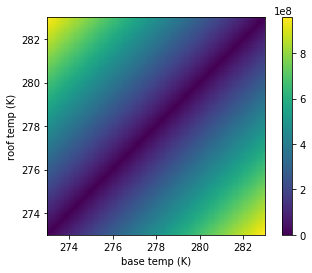

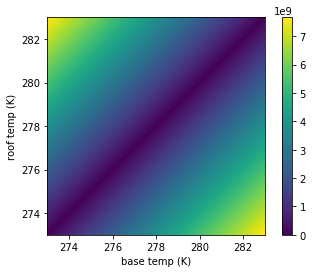

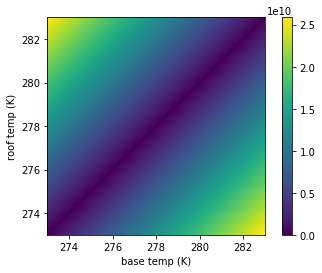

In [20]:
R_crit = 1708

Ra = np.zeros((len(T_base), len(T_top)))

# This is the numpy way to do this
Tx,Ty = np.meshgrid(T_base,T_top)
def Rayleigh_np(height):
    return ((g*beta)/(nu_visc*alpha)) * np.abs((Tx-Ty)) * height**3

for hval in H:
    plt.figure()
    plt.imshow(Rayleigh_np(hval),extent=(T_base[0],T_base[-1],T_top[0],T_top[-1]),origin='lower')
    plt.xlabel("base temp (K)")
    plt.ylabel("roof temp (K)")
    plt.colorbar()



## Reynolds Number - Is flow laminar or turbulent

Velocity averages [0.08421091 0.08412983 0.08404891 0.08396815 0.08388754 0.08380708
 0.08372678 0.08364664 0.08356664 0.0834868  0.08340711 0.08332758
 0.08324819 0.08316896 0.08308987 0.08301094 0.08293216 0.08285353
 0.08277504 0.0826967  0.08261852 0.08254048 0.08246258 0.08238484
 0.08230724 0.08222978 0.08215248 0.08207531 0.0819983  0.08192142
 0.08184469 0.08176811 0.08169167 0.08161537 0.08153921 0.08146319
 0.08138732 0.08131159 0.08123599 0.08116054 0.08108523 0.08101006
 0.08093503 0.08086013 0.08078538 0.08071076 0.08063628 0.08056194
 0.08048774 0.08041367 0.08033973 0.08026594 0.08019228 0.08011875
 0.08004536 0.0799721  0.07989898 0.07982599 0.07975313 0.07968041
 0.07960782 0.07953536 0.07946304 0.07939084 0.07931878 0.07924684
 0.07917504 0.07910337 0.07903182 0.07896041 0.07888912 0.07881797
 0.07874694 0.07867604 0.07860526 0.07853462 0.0784641  0.07839371
 0.07832344 0.0782533  0.07818328 0.0781134  0.07804363 0.07797399
 0.07790447 0.07783508 0.07776581 0.07769667

Text(0, 0.5, 'Air Dens')

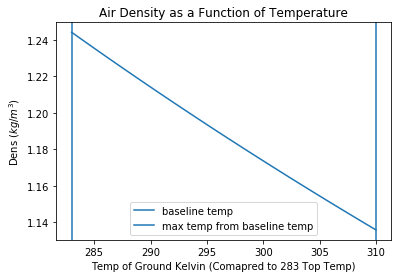

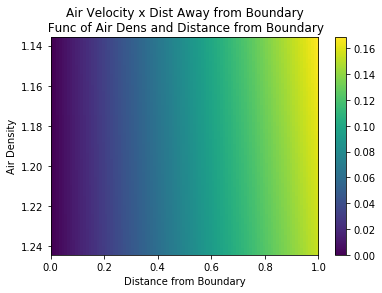

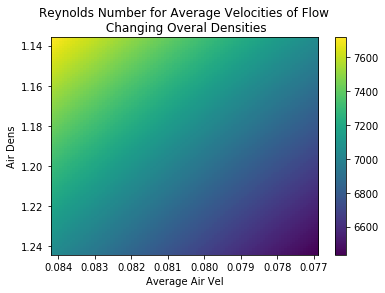

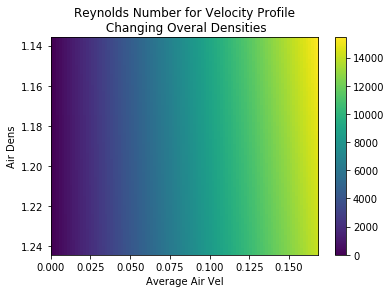

In [58]:
T_gradient = np.zeros((len(T_base),len(T_top)))
Re_crit = 2600
mu_static_visc = 0.0000181  #kg/(m.s)
test_volume = 0.000001 #m^3
test_area = 4 #0.0001 #m^2   ###CHECK THIS!!!
test_distance = np.linspace(0, 1, 100) #distnace away from the boundary

max_deltaT = T_base.max() - T_top.min()
T_gradient = np.linspace(0, max_deltaT, len(T_base)) + T_base[0]

D_H = 8/6 #The hydraulic diameter of a square duct that is only half of the volume of a unit cell that is 2m x 2m x 2m

### DEFINE THESE VALUES ###
#D_H = 4*cross_A / wetted_P   #Hydraulic diameter, assuming a square duct

def Re_rho(): #dens as a func of temp...ADD TENP INPUT HERE???
    P = 101300 #kPa
    R = 8.314  #0.167226 #J/Kg K
    const = P / R
    rho = np.zeros(len(T_base))
    
    max_deltaT = T_base.max() - T_top.min()
    T_gradient = np.linspace(0, max_deltaT, len(T_base)) + T_base[0]
    for i in range(len(T_gradient)):
        rho[i] = const * (1/T_gradient[i]) * 0.0289 #this facotr comes from converting units to mol/m^3 to kg/m^3
    
    return rho
### CHECK THESE VALUES ABOVE...ARE THEY REALISTIC???

def air_vel(density_T, distance):   #x, dist away from boundary, should go to 1m
    const2 = (density_T*test_volume*9.8) / (test_area*mu_static_visc)
    ### THIS IS LIMITED IN ACCURACY BC THE CLOSER TO CENTER THE AIR IS, THE SLOWER IT WILL BE MOVING. THIS MODEL DOES NOT DEMONSTRATE THIS
    return const2 * distance

    
#plt.plot(np.linspace(1,100, len(Re_rho())), Re_rho())
#print(air_vel(1.2, test_distance))
#plt.figure()
#plt.plot(test_distance, air_vel(1.2, test_distance))

def Reynold(velocity, density):
    Re = (D_H / mu_static_visc) * velocity * density
    return Re

###   PLOTTING THE DENS AS FUNC OF TEMP
plt.figure()
plt.plot(np.linspace(T_gradient[0], T_gradient[-1], len(T_base)), Re_rho())
plt.axvline(T_gradient[0], label='baseline temp')
plt.axvline(T_gradient[-1], label='max temp from baseline temp')
plt.title('Air Density as a Function of Temperature')
plt.xlabel('Temp of Ground Kelvin (Comapred to 283 Top Temp)')
plt.ylabel('Dens ($kg/m^3$)')
plt.legend()

###   PLOTTING THE AIR VEL AS A FUNCTION OF DIST FROM BOUNDARY AND AIR DENSITY
dens = Re_rho()
air_vel_array = np.zeros((len(dens), len(test_distance)))

for i in range(len(dens)):
    for j in range(len(test_distance)):
        air_vel_array[i][j] = air_vel(dens[i], test_distance[j])
#print(air_vel_array)
plt.figure()
plt.imshow(air_vel_array, extent=[test_distance[0], test_distance[-1], dens[0], dens[-1]], aspect='auto')
plt.colorbar()
plt.title('Air Velocity x Dist Away from Boundary\n Func of Air Dens and Distance from Boundary')
plt.xlabel('Distance from Boundary')
plt.ylabel('Air Density')

###   VISUALIZING THE REYNOLDS # ASSUMING THAT THE AVERAGE FLUID VEL IS THE AVERAGE VEL PER DENSITY SELECTION
vel_averages = np.zeros(len(air_vel_array[0][:]))
for i in range(len(air_vel_array[0][:])):
    vel_averages[i] = np.mean(air_vel_array[i][:])

print("Velocity averages",vel_averages)

Re_array = np.zeros((len(vel_averages), len(dens)))
for i in range(len(vel_averages)):
    for j in range(len(dens)):
        Re_array[i][j] = Reynold(vel_averages[i], dens[j]) 
        
plt.figure()
plt.imshow(Re_array, extent=[vel_averages[0], vel_averages[-1], dens[0], dens[-1]], aspect='auto')
plt.colorbar()
plt.title('Reynolds Number for Average Velocities of Flow\n Changing Overal Densities')
plt.xlabel('Average Air Vel')
plt.ylabel('Air Dens')

###   VISUALIZING REYNOLDS NUMBER GIVEN A FULL VEL SPECTRUM (FROM BOUNDARY TO CENTER)
Re_array_2 = np.zeros((len(air_vel_array[0][:]), len(dens)))
for i in range(len(dens)):
    Re_array_2[i][:] = Reynold(air_vel_array[0][:], dens[i])
    
plt.figure()
plt.imshow(Re_array_2, extent=[air_vel_array[0][0], air_vel_array[0][-1], dens[0], dens[-1]], aspect='auto')
plt.colorbar()
plt.title('Reynolds Number for Velocity Profile\n Changing Overal Densities')
plt.xlabel('Average Air Vel')
plt.ylabel('Air Dens')


## Prandlt Number - Ratio of momentum diffusivity to thermal diffusivity 

In [59]:
def Prandlt():
    return nu_visc / alpha

## Grashof Number - Ratio of buoyant to viscous forces on fluid 

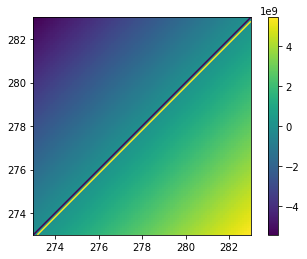

In [23]:
Gr_crit = 10**8

def Grashof(G_height):
    c = (g*beta*G_height**3) / (nu_visc**2)
    return c*(Tx - (Ty+Tx)/2)
    
# This is how you show a contour on top of an image/density plot
plt.figure()
zdata = Grashof_np(H[1])
plt.imshow(zdata,extent=(T_base[0],T_base[-1],T_top[0],T_top[-1]),origin='lower')
plt.colorbar()
plt.contour(Tx,Ty,zdata,levels=[0,Gr_crit])


